# Cross-Validation at a Range of Tree Depths

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

sns.set()

In [2]:
# Build a simple data set with y = x + random
n_points = 100

# x values for plotting
x_plot = [(float(i)/float(n_points) - 0.5) for i in range (n_points + 1)]

# x needs to be a list of lists
x = [[s] for s in x_plot]

# y (labels) has random noise added to x value
# set seed
np.random.seed(1)
y = [s + np.random.normal(scale=0.1) for s in x_plot]

n_row = len(x)

# fit trees with several different values for depth and use x validation to see which works best
depth_list = [1, 2, 3, 4, 5, 6, 7]
x_val_MSE = []
n_x_val = 10

for i_depth in depth_list:
    
    # build a cross-validation loop to fit tree and evaluate on out of sample data
    for i_x_val in range(n_x_val):
        
        # Define test and training index sets
        idx_test = [a for a in range(n_row) if a % n_x_val == i_x_val % n_x_val]
        idx_train = [a for a in range(n_row) if a % n_x_val != i_x_val % n_x_val]
        
        # Define test and training attribute and label sets
        x_train = [x[r] for r in idx_train]
        x_test = [x[r] for r in idx_test]
        y_train = [y[r] for r in idx_train]
        y_test = [y[r] for r in idx_test]
        
        # train tree of appropriate depth and accumulate out of sample (oos) errors
        tree_model = DecisionTreeRegressor(max_depth=i_depth)
        tree_model.fit(x_train, y_train)
        
        tree_prediction = tree_model.predict(x_test)
        error = [y_test[r] - tree_prediction[r] for r in range(len(y_test))]
        
        # accumulate squared errors
        if i_x_val == 0:
            oos_errors = sum([e * e for e in error])
        
        else:
            # accumulate predictions
            oos_errors += sum([e * e for e in error])
            
    # average the squared errors and accumulate by tree depth
    mse = oos_errors/n_row
    x_val_MSE.append(mse)

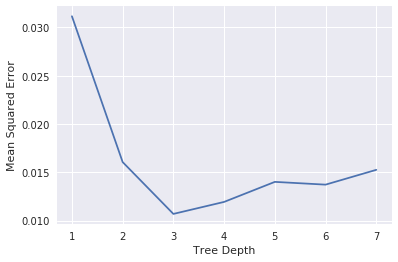

In [4]:
plt.plot(depth_list, x_val_MSE)
plt.axis('tight')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.show()